# YOLO (You Only Look Once)

In [5]:
from YOLO import *

ImportError: libSM.so.6: cannot open shared object file: No such file or directory

In [3]:
model = Darknet("YOLO/cfg/yolov3.cfg")
model.load_weights("YOLO/yolov3.weights")

In [4]:
det = model(img)
print(type(det))
detection('YOLO/dog-cycle-car.png')

Loading network.....
Network successfully loaded
dog-cycle-car.png    predicted in  0.081 seconds
Objects Detected:    bicycle truck dog
----------------------------------------------------------
SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.000
Loading batch            : 0.036
Detection (1 images)     : 0.084
Output Processing        : 0.000
Drawing Boxes            : 0.024
Average time_per_img     : 0.146
----------------------------------------------------------


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


In [5]:
import os
os.listdir()

['det',
 '.ipynb_checkpoints',
 'README',
 'YOLO',
 'ECE285_Sauvage.ipynb',
 'RCNN',
 '.git',
 '.gitignore',
 '1506.02640.pdf']

# RCCN

In [19]:
from RCNN import *
import os
import torch
from model.faster_rcnn_vgg16 import FasterRCNNVGG16
from RCNN.trainer import FasterRCNNTrainer
from data.util import read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [20]:
img = read_image('RCNN/dog-cycle-car.png')
img = torch.from_numpy(img)[None]
model_dir = '../'

In [21]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

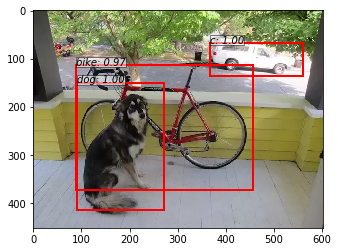

In [22]:
trainer.load(model_dir+'fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))